In [1]:
import scipy.stats as ss
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
tab0 = Table.read('../Sampling/FullSampleWithLum.fits')
tab1 = Table.read('../LumMatch/LumMatch.fits')
import matplotlib

In [2]:
# T1 sample
frat = tab0['frat_nv/civ']
# mask = (frat>0)
frat=frat
iw3 = tab0['i-w3']
rw3 = tab0['r-w3']
rz = tab0['r-z']
rew = tab0['rew_gf']
kt80 = tab0['kurt80_gf']
fwhm = tab0['fwhm_gf']
asy= tab0['asy_gf']
bal = tab0['bal_flag_vi']
iz = iw3 - rw3 + rz
L = tab0['Lum']


In [3]:
# LM sample
frat_L = tab1['frat_nv/civ']
# mask = (frat_L>0)
frat_L=frat_L
iw3_L = tab1['i-w3']
rw3_L = tab1['r-w3']
rz_L = tab1['r-z']
rew_L = tab1['rew_gf']
kt80_L = tab1['kurt80_gf']
fwhm_L = tab1['fwhm_gf']
asy_L = tab1['asy_gf']
bal_L = tab1['bal_flag_vi']
iz_L = iw3_L - rw3_L + rz_L
L_L = tab1['Lum']
iw1_L = tab1['i-w1']
w1w3_L = iw3_L - iw1_L

In [4]:
print(np.min(iw3_L),np.max(iw3_L))
print(np.min(np.log10(rew_L)),np.max(np.log10(rew_L)))
print(np.min(kt80_L),np.max(kt80_L))

0.8008424710000028 8.014450848000003
0.27954328941221607 2.6183043044497327
0.1111972583656645 0.3974529340059707


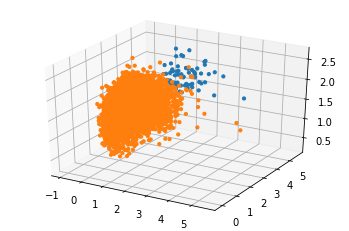

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
mask_erq = (iw1_L>-10) & (w1w3_L>-10)  & ((iw3_L>4.6) & (rew_L>100))
mask_Noterq = (iw1_L>-10) & (w1w3_L>-10) & ((iw3_L<4.6) | (rew_L<100))

# plt.scatter(iw1_L[mask2], w1w3_L[mask2], alpha=0.7, s=7)
ax.scatter3D(iw1_L[mask_erq], w1w3_L[mask_erq], np.log10(rew_L[mask_erq]), alpha=1, s=10)
ax.scatter3D(iw1_L[mask_Noterq], w1w3_L[mask_Noterq], np.log10(rew_L[mask_Noterq]), alpha=1, s=10)
# plt.xlabel('iw1')
plt.show()
# plt.ylabel('w1w3')

In [6]:
from sklearn.svm import SVC # "Support vector classifier"
import matplotlib.pyplot as plt
model = SVC(kernel='linear', C=1)
mask1 = (iw1_L>-10) & (w1w3_L>-10)
X = np.array(list(zip(iw1_L[mask1], w1w3_L[mask1])))
y =  (rew_L[mask1]>80) & (iw3_L[mask1]>4)

 
model.fit(X,y)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

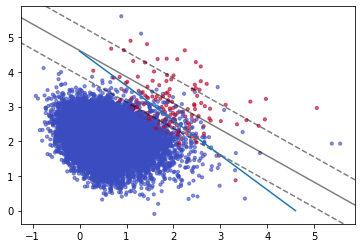

In [7]:
plt.scatter(X[:,0], X[:,1], c=y, s=10, cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(model)
plt.plot([4.6,0],[0,4.6])

In [6]:
#  ERQ sample
erq0 = (iw3_L>4.6)
iw3_erq0 = iw3_L[erq0]
rew_erq0 = rew_L[erq0]
kt80_erq0 =  kt80_L[erq0]
fwhm_erq0 =  fwhm_L[erq0]
rw3_erq0 = rw3_L[erq0]
rz_erq0 =  rz_L[erq0]
frat_erq0 =frat_L[erq0]
asy_erq0 =  asy_L[erq0]
L_erq0 =  L_L[erq0]
iz_erq0 = iw3_erq0 - rw3_erq0 + rz_erq0

In [7]:
#  CERQ sample
erq1 = (iw3_L>=4.6) & (rew_L>=100)
iw3_erq1 = iw3_L[erq1]
rew_erq1 = rew_L[erq1]
kt80_erq1 =  kt80_L[erq1]
fwhm_erq1 =  fwhm_L[erq1]
rw3_erq1 = rw3_L[erq1]
rz_erq1 =  rz_L[erq1]
frat_erq1 =frat_L[erq1]
asy_erq1 =  asy_L[erq1]
L_erq1 =  L_L[erq1]
iz_erq1 = iw3_erq1 - rw3_erq1 + rz_erq1

In [21]:
scaler = MinMaxScaler()
from seaborn import pairplot, kdeplot
import pandas as pd
data_s = scaler.fit_transform(np.array(list(zip(iw3, np.log10(rew), kt80, frat, fwhm, iz, L))))
data_L_s = scaler.fit_transform(np.array(list(zip(iw3_L, np.log10(rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L))))
data = np.array(list(zip(iw3, np.log10(rew), kt80, frat, fwhm, iz, L)))
data_L = np.array(list(zip(iw3_L, np.log10(rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L)))
data_erq0 = np.array(list(zip(iw3_erq0, np.log10(rew_erq0), kt80_erq0, frat_erq0, fwhm_erq0, iz_erq0, L_erq0)))
data_erq1 = np.array(list(zip(iw3_erq1, np.log10(rew_erq1), kt80_erq1, frat_erq1, fwhm_erq1, iz_erq1, L_erq1)))


data = np.array(list(zip(iw3, np.log10(rew), kt80, frat, fwhm, iz, L)))
data_L = np.array(list(zip(iw3_L, np.log10(rew_L), kt80_L, frat_L, fwhm_L, iz_L, L_L)))
data_erq0 = np.array(list(zip(iw3_erq0, np.log10(rew_erq0), kt80_erq0, frat_erq0, fwhm_erq0, iz_erq0, L_erq0)))
data_erq1 = np.array(list(zip(iw3_erq1, np.log10(rew_erq1), kt80_erq1, frat_erq1, fwhm_erq1, iz_erq1, L_erq1)))


df = pd.DataFrame(data=data, columns=['i-w3', 'REW', 'kt80','NV-CIV', 'FWHM', 'i-z', 'Lum'])
df_L = pd.DataFrame(data=data_L, columns=['i-w3', 'REW','kt80' , 'NV-CIV', 'FWHM', 'i-z', 'Lum'])
df_s = pd.DataFrame(data=data_s, columns=['i-w3', 'REW', 'kt80','NV-CIV', 'FWHM', 'i-z', 'Lum'])
df_L_s = pd.DataFrame(data=data_L_s, columns=['i-w3', 'REW','kt80' , 'NV/CIV', 'FWHM', 'i-z', 'Lum'])



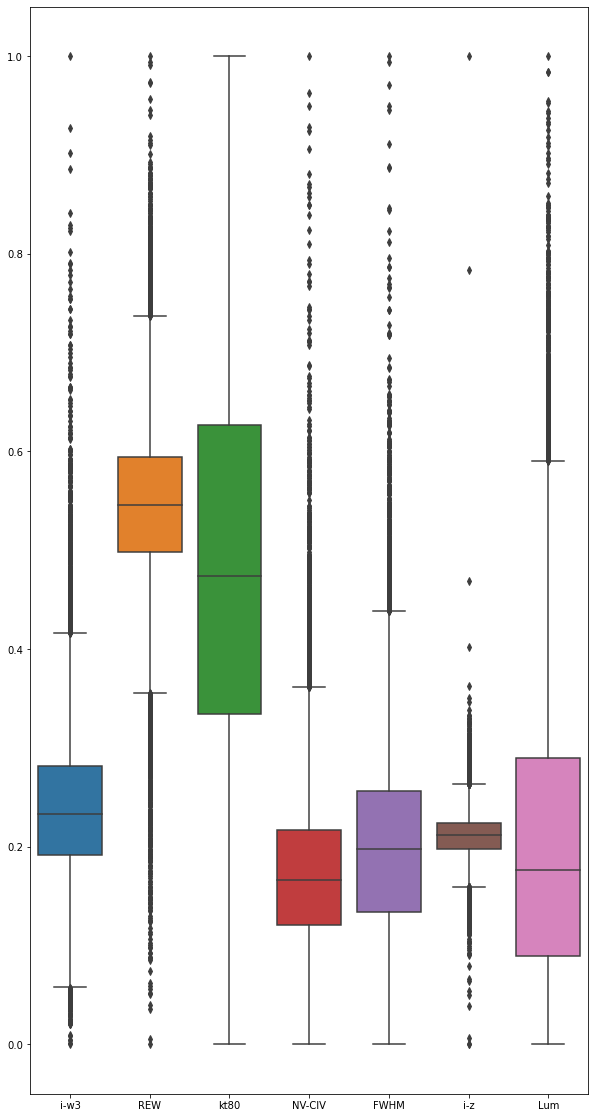

In [9]:
# Getting to know the data by Box plot of raw data and scaled data
import seaborn as sn
import matplotlib.pyplot as plt
# Outliners detection and class imbalance

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df_L_s, orient="v",ax=axes)
plt.savefig('box_plot_scaled_L.png', dpi=200)
plt.show()
# # Correlation analysis
# corrMatt = df_L.corr()
# mask = np.array(corrMatt)
# # mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, vmax=.95, annot=True)
# plt.savefig('cor-matrix_L.png', dpi=800)
# plt.show()

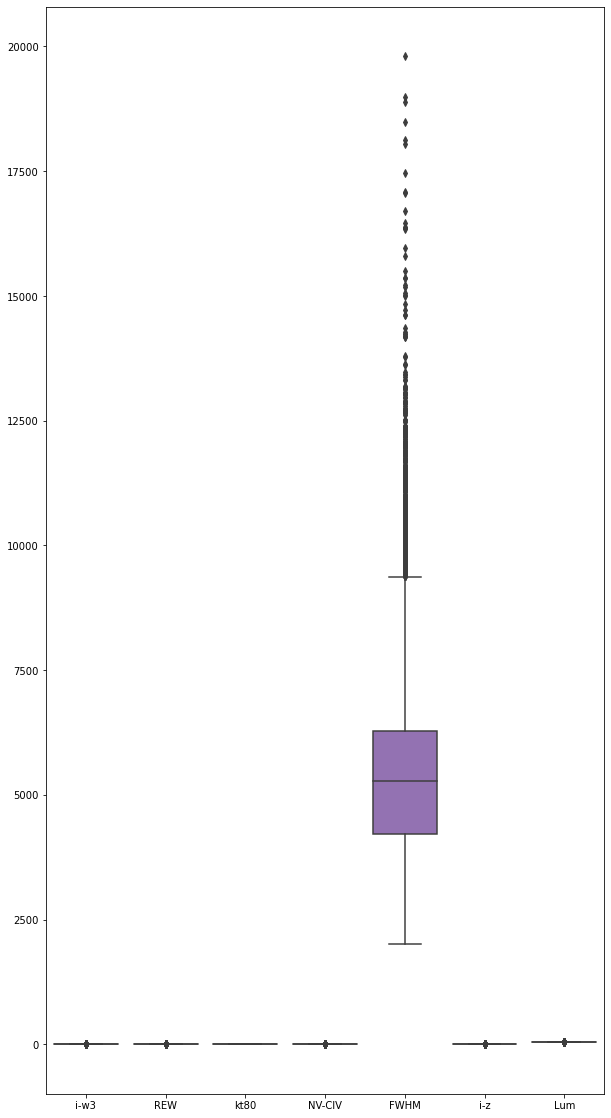

In [12]:
# Getting to know the data by Box plot of raw data and scaled data
import seaborn as sn
import matplotlib.pyplot as plt
# Outliners detection and class imbalance

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=df, orient="v",ax=axes)
plt.savefig('box_plot_scaled.png', dpi=200)
plt.show()
# # Correlation analysis
# corrMatt = df.corr()
# mask = np.array(corrMatt)
# # mask[np.tril_indices_from(mask)] = False
# fig,ax= plt.subplots()
# fig.set_size_inches(20,10)
# sn.heatmap(corrMatt, vmax=.95, annot=True)
# plt.savefig('cor-matrix.png', dpi=200)
# plt.show()

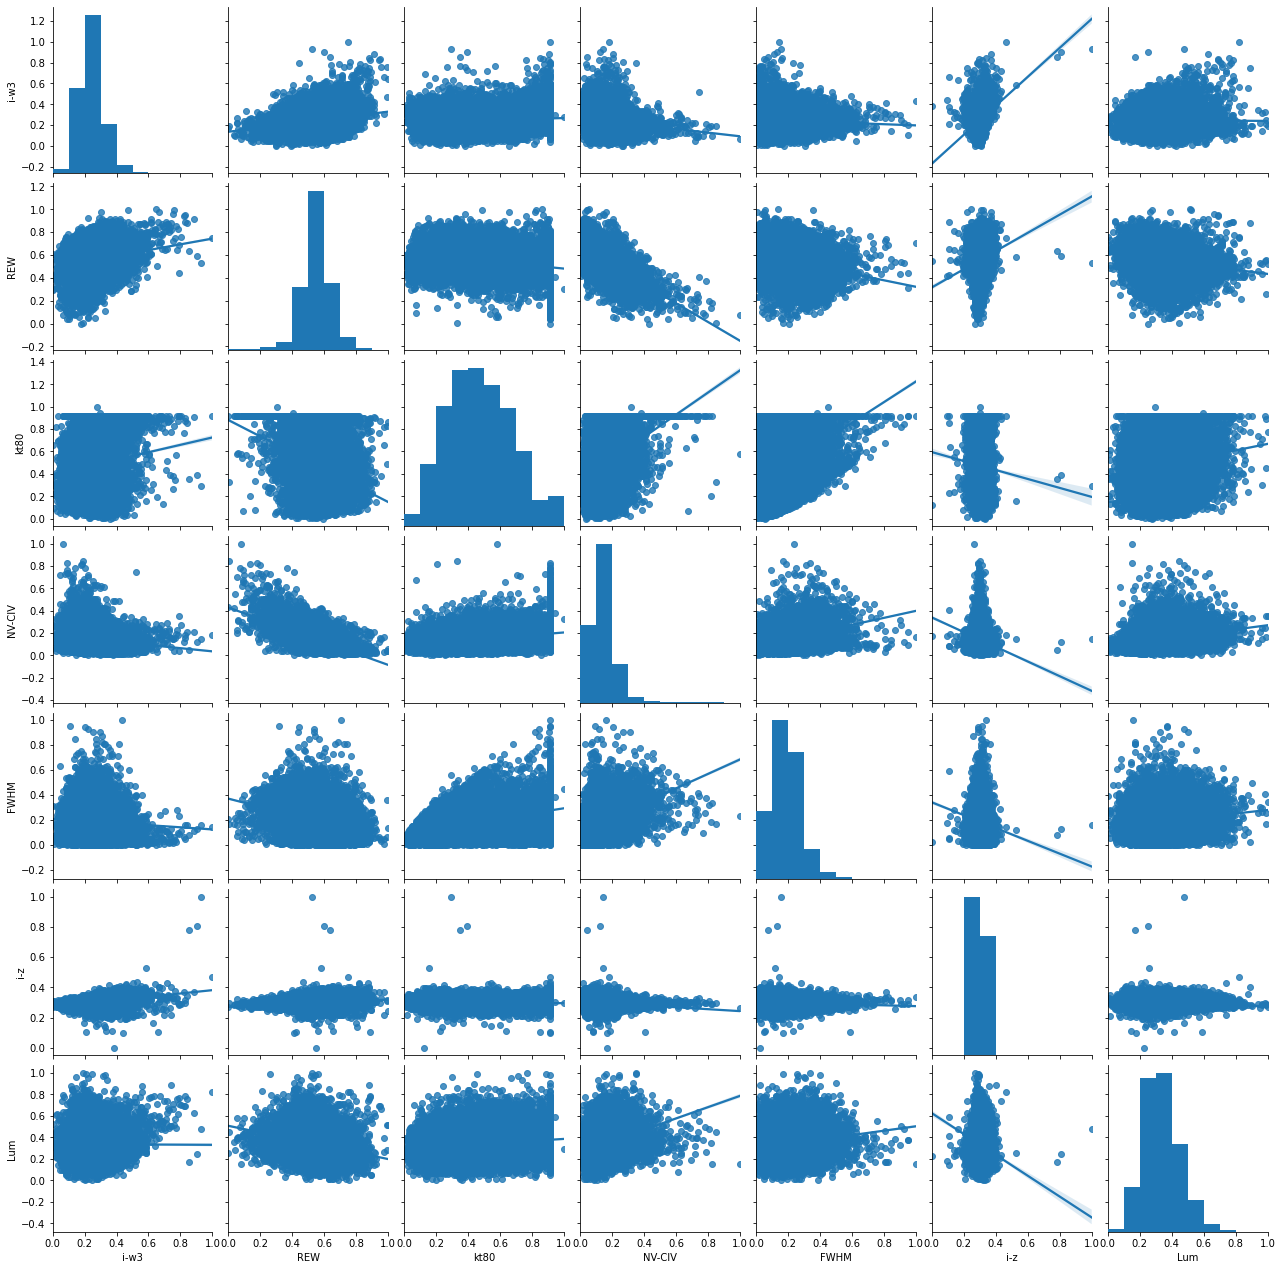

In [13]:
sns_plot = pairplot(df_s, kind='reg')
plt.savefig('pair_plot_scaled.png')

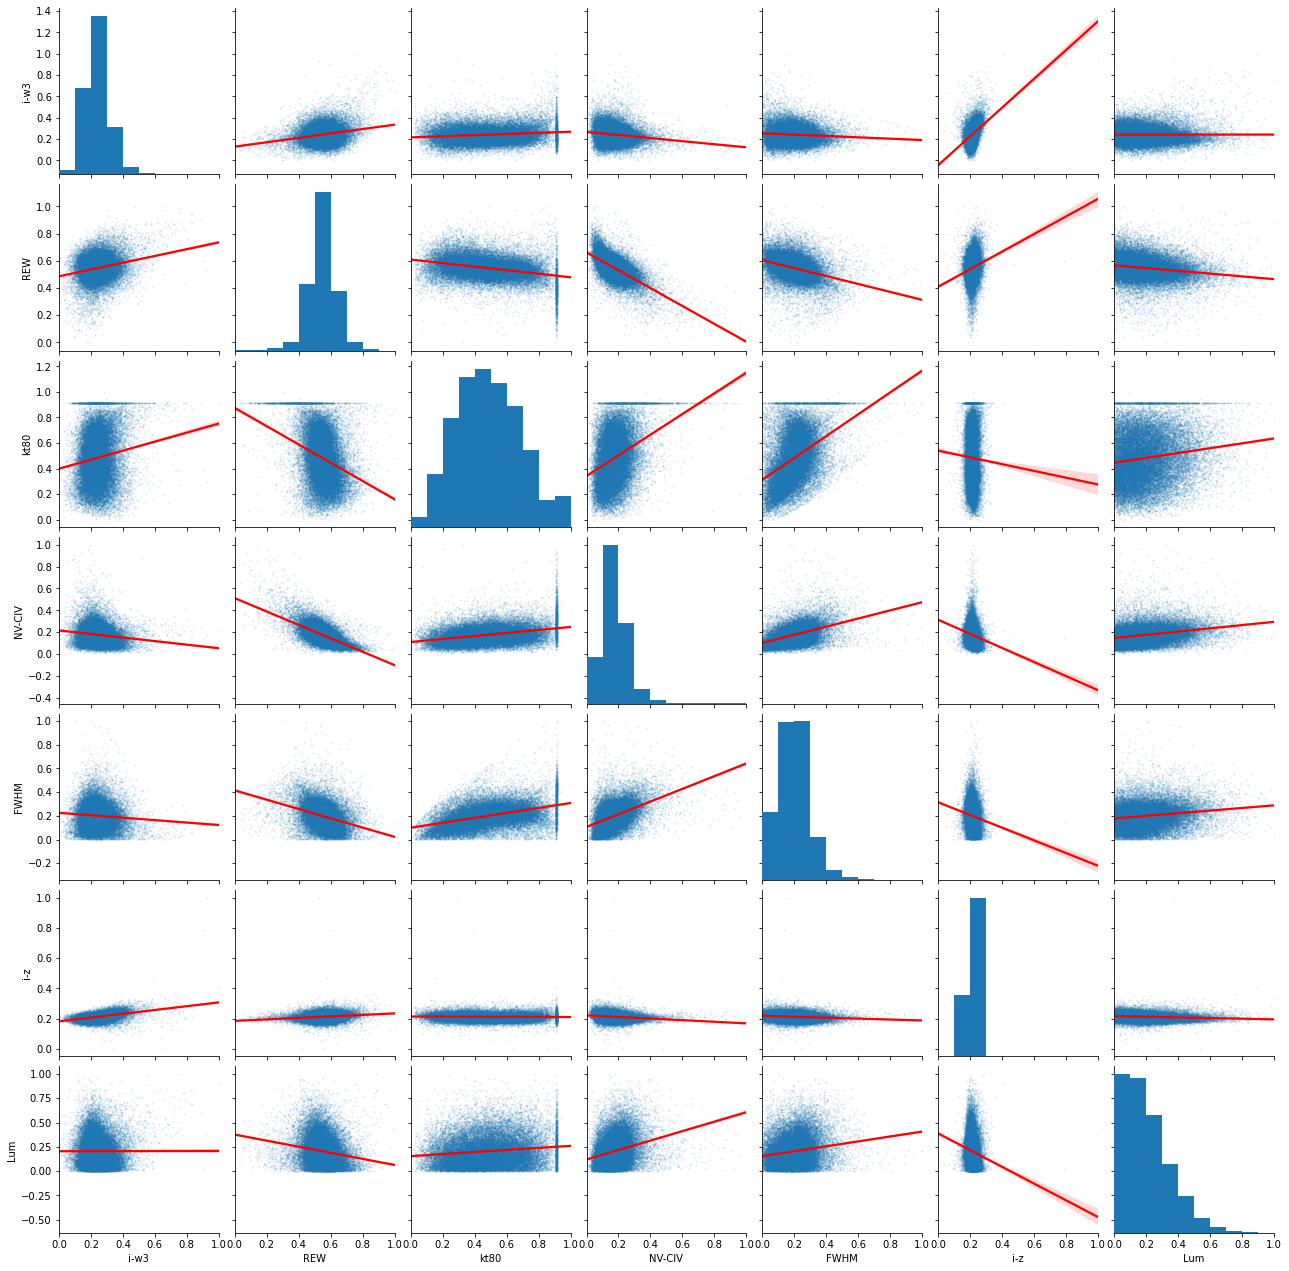

In [14]:
sns_plot = pairplot(df_L_s, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 's':1}})
plt.savefig('pair_plot_reg_L_scaled.png', dpi=200)

0 5 0.15350604015511204 0.1687631305428693 0.11037808485747787 0.1252069576969824


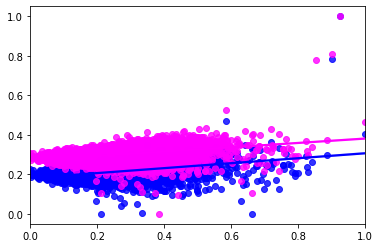

1 3 0.42183318987325 0.4031178590175184 -0.5143530694189251 -0.6130981097411867


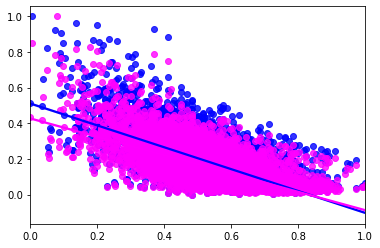

2 3 0.1154794454008845 0.11133702658285083 0.11663288512414721 0.13738735400166177


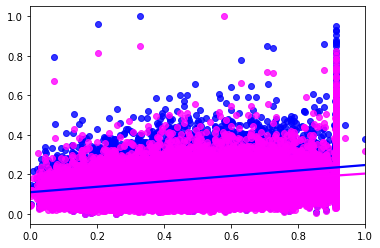

2 4 0.18511702579234235 0.1788225645930709 0.20085051230187945 0.2090943260737306


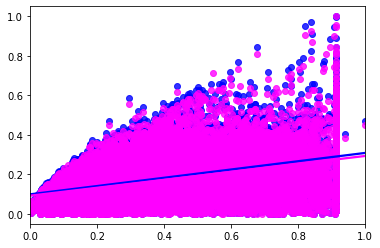

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
erq0 = (iw3_L>=4.6) 
erq1 = (iw3_L>=4.6) & (rew_L>=100)

CC = data_s
CC_L = data_L_s
CC_erq0 = data_L_s[erq0]
CC_erq1 = data_L_s[erq1]
R2=np.zeros([7,7])
R2_err=np.zeros([7,7])
R2_L=np.zeros([7,7])
a_L=np.zeros([7,7])
b_L=np.zeros([7,7])
a=np.zeros([7,7])
b=np.zeros([7,7])
a_err=np.zeros([7,7])
b_err=np.zeros([7,7])

for i in range(7):
    for j in range(7):
        if(j>i):
            reg = LinearRegression()

            x ,y = CC[:,i], CC[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg.fit(x,y)
            y_pred = reg.predict(x)
            R2[i,j] = r2_score(y,y_pred)
            a[i,j] = reg.coef_
            b[i,j] = reg.intercept_
            
            
            # BootStrap 
            D = np.array(list(zip(x,y)))
            a_pool=[]
            b_pool=[]
            for k in range(200):
                ind_s = np.random.choice(range(len(D)), len(D), replace=True)
                D_s = D[ind_s,:]
                x_s, y_s = D_s[:,0], D_s[:,1]
                x_s=x_s.reshape(-1,1)
                y_s=y_s.reshape(-1,1)
                reg.fit(x_s,y_s)
                a_pool.append(reg.coef_)
                b_pool.append(reg.intercept_)
            
            a_err[i,j] = np.std(a_pool)
            b_err[i,j] = np.std(b_pool)
            
            x ,y = CC_L[:,i], CC_L[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg = LinearRegression().fit(x,y)
            R2_L[i,j] = reg.score(x,y)
            a_L[i,j] = reg.coef_
            b_L[i,j] = reg.intercept_
            if((abs(a_L[i,j]-a[i,j])> 2*a_err[i,j]) & (abs(b_L[i,j]-b[i,j])>2*b_err[i,j]) & (R2[i,j]>0.1)):
                print(i,j, R2[i,j], R2_L[i,j], a[i,j], a_L[i,j])
                sn.regplot(df_L_s.values[:,i], df_L_s.values[:,j], color='blue')
                sn.regplot(df_s.values[:,i], df_s.values[:,j], color='magenta')
#                 plt.plot([0, b_L[i,j]], [1, a_L[i,j]+b_L[i,j]], ls='--', alpha=.8, c='C0')
#                 plt.plot([0, b[i,j]], [1, a[i,j]+b[i,j]], ls='--', alpha=.8, c='C3')
                plt.show()
            
 
   

In [11]:
df_L_s.columns[1]

'REW'

1 6 0.15350604015511204 0.007905141448071418 0.11037808485747787 0.05846007436493842 0.4703652048282673 0.0034750979976303662
cp: cannot stat 'fid': No such file or directory


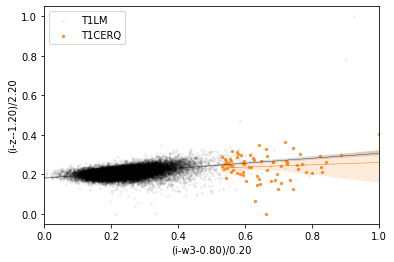

3 5 0.18511702579234235 0.03357332336507146 0.20085051230187945 0.05191826042968223 0.7415079511888484 0.0027451219433805036
cp: cannot stat 'fid': No such file or directory


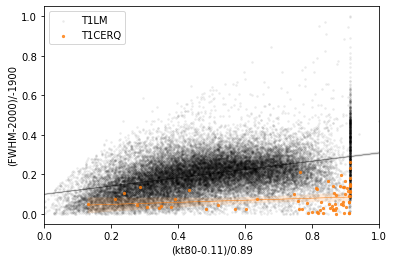

4 5 0.18175811123459717 0.0019270478057251683 0.5798664583296312 0.03294517416063014 0.9431848942331786 0.01007884305774715
cp: cannot stat 'fid': No such file or directory


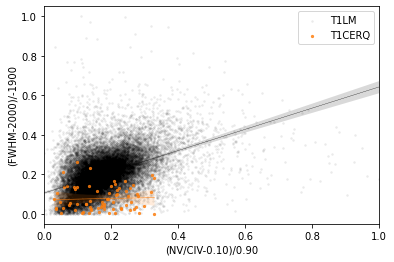

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

CC = data_s
CC_L = data_L_s
CC_erq0 = data_L_s[erq0]
CC_erq1 = data_L_s[erq1]
R2=np.zeros([7,7])
R2_err=np.zeros([7,7])
R2_L=np.zeros([7,7])
a_L=np.zeros([7,7])
b_L=np.zeros([7,7])
a=np.zeros([7,7])
b=np.zeros([7,7])
a_err=np.zeros([7,7])
b_err=np.zeros([7,7])

from tqdm import tqdm
for i in range(7):
    for j in range(7):
        if(j>i):
            reg = LinearRegression()

            x ,y = CC[:,i], CC[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg.fit(x,y)
            y_pred = reg.predict(x)
            R2[i,j] = r2_score(y,y_pred)
            a[i,j] = reg.coef_
            b[i,j] = reg.intercept_
            
            
            # BootStrap df_L_s.columns[i]
            D = np.array(list(zip(x,y)))
            a_pool=[]
            b_pool=[]
            for k in (range(100)):
                ind_s = np.random.choice(range(len(D)), len(D), replace=True)
                D_s = D[ind_s,:]
                x_s, y_s = D_s[:,0], D_s[:,1]
                x_s=x_s.reshape(-1,1)
                y_s=y_s.reshape(-1,1)
                reg.fit(x_s,y_s)
                a_pool.append(reg.coef_)
                b_pool.append(reg.intercept_)
            
            a_err[i,j] = np.std(a_pool)
            b_err[i,j] = np.std(b_pool)
            
            x ,y = CC_erq1[:,i], CC_erq1[:,j]
            x=x.reshape(-1,1)
            y=y.reshape(-1,1)
            reg = LinearRegression().fit(x,y)
            R2_L[i,j] = reg.score(x,y)
            a_L[i,j] = reg.coef_
            b_L[i,j] = reg.intercept_
            if((abs(a_L[i,j]-a[i,j])> 2*a_err[i,j]))& (R2[i,j]>0.1) & (abs(a_L[i,j]-a[i,j])/a[i,j]>0.1):# & (abs(b_L[i,j]-b[i,j])> 2*b_err[i,j])):
                print(i+1,j+1, R2[i,j], R2_L[i,j], a[i,j], a_L[i,j], abs(a_L[i,j]-a[i,j])/a[i,j], a_err[i,j])
                sn.regplot(df_L_s.values[:,i], df_L_s.values[:,j], color='k', n_boot=10000, ci=100, scatter_kws={'alpha':0.051, 's':3}, 
                           line_kws={'linewidth':.3}, label='T1LM')
                sn.regplot(df_L_s.values[erq1,i], df_L_s.values[erq1,j], color='C1', n_boot=1000, ci=99, marker='o', scatter_kws={'alpha':0.8, 's':5},
                           line_kws={'linewidth':.51}, label='T1CERQ')
                plt.legend()
                plt.xlabel('(%s-%.2f)/%.2f'%(df_L_s.columns[i],np.min(df_L.values[:,i]), np.max(df_L_s.values[:,i]) - np.min(df_L.values[:,i])))
                if (j==4):
                    
                    plt.ylabel('(%s-%d)/%d'%(df_L_s.columns[j],np.round(np.min(df_L.values[:,j])/100)*100, np.round(np.max(df_L_s.values[:,j])-np.min(df_L.values[:,j])/100)*100))
                else:
                    plt.ylabel('(%s-%.2f)/%.2f'%(df_L_s.columns[j],np.min(df_L.values[:,j]), np.max(df_L_s.values[:,j]) - np.min(df_L.values[:,j])))
                fid = '%d-%d.png'%(i,j)
                plt.savefig(fid, dpi=200, bbox_inches='tight')
                !cp fid ../../erqPaper/fig
                plt.show()
            
 
   

In [22]:
fid

'NV-CIV-FWHM.png'